All of the code presented in this notoebook is derived from or based on the following sources:

O'Reilly&reg; book Introduction to Machine Learning with Python &copy; 2017 by Andreas C. Muller and Sarah Guido.  Please make sure you present the correct attestation to this book if you reference or utilize any of the information in this notebook.  And please buy the book, it's excellent!

Keras with TensorFlow Course - Python Deep Learning and Neural Networks for Beginners Tutorial created or sponsored by DeepLizard.com and offered on YouTube: https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=1791s

A notebook to collect interesting graphs and plots

In [13]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D, axes3d

Plot of decision boundary by linearSVM for dataset with 3 features

Text(0.5, 0, 'f 2')

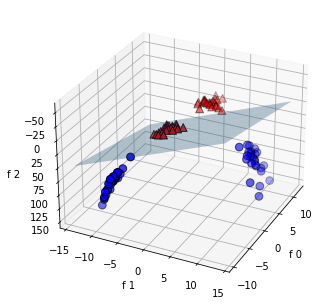

In [15]:
# Generate a data set with 3 features
X,y = make_blobs(centers=4,random_state=8)
y = y % 2;
X = np.hstack([X, X[:,1:] ** 2]) # Add the new feature

# Train the model
linear_svm_3d = LinearSVC(max_iter=5000).fit(X,y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

# Start the plot
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

# Plot the data set across the 3 features
mask = y == 0
ax.scatter(X[mask,0], X[mask,1], X[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X[~mask,0], X[~mask,1], X[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

# Plot the plane of the decision boundary
xx = np.linspace(X[:,0].min()-2, X[:,0].max()+2,50)
yy = np.linspace(X[:,1].min()-2, X[:,1].max()+2,50)
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("f 0")
ax.set_ylabel("f 1")
ax.set_zlabel("f 2")

Decision boundary for neural network

Text(0, 0.5, 'f 1')

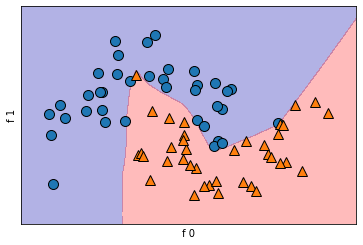

In [16]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel('f 0')
plt.ylabel('f 1')

Postive vs negative histogram of features

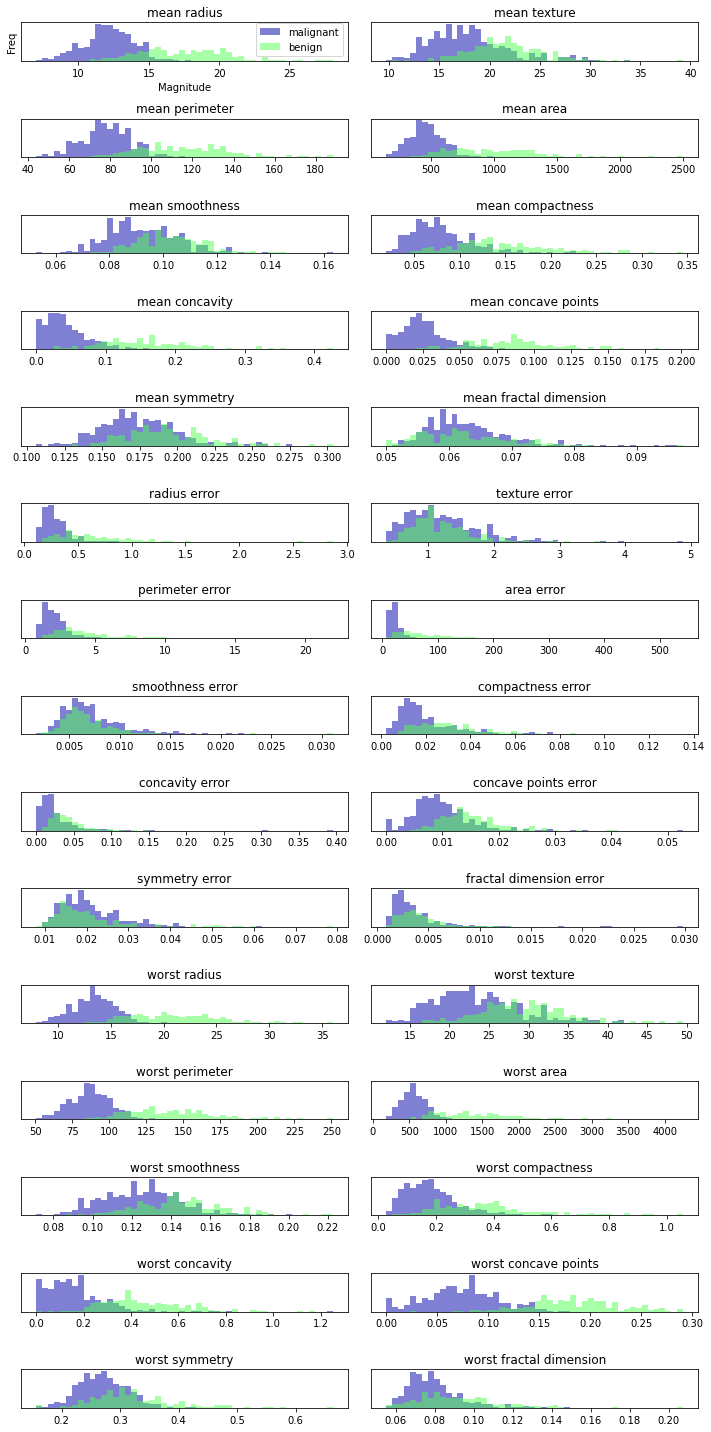

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]
fig, axes = plt.subplots(15,2,figsize=(10,20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Magnitude")
ax[0].set_ylabel("Freq")
ax[0].legend(["malignant","benign"], loc="best")
fig.tight_layout()

In [18]:
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
train_labels = []
train_samples = []
# Targets: 1 = experienced side effects, 2 = did not experience side effects
# 5% of younger people experienced side effects, 5% of older people did not experience side effects
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [19]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
model_with_validation = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, input_shape=(1,), activation='softmax')
])
model_with_validation.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_with_validation.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6757 - accuracy: 0.5540 - val_loss: 0.6638 - val_accuracy: 0.6333
Epoch 2/30
189/189 - 0s - loss: 0.6541 - accuracy: 0.6492 - val_loss: 0.6400 - val_accuracy: 0.7238
Epoch 3/30
189/189 - 0s - loss: 0.6322 - accuracy: 0.7074 - val_loss: 0.6174 - val_accuracy: 0.7381
Epoch 4/30
189/189 - 0s - loss: 0.6098 - accuracy: 0.7291 - val_loss: 0.5932 - val_accuracy: 0.7381
Epoch 5/30
189/189 - 0s - loss: 0.5855 - accuracy: 0.7561 - val_loss: 0.5675 - val_accuracy: 0.7619
Epoch 6/30
189/189 - 0s - loss: 0.5597 - accuracy: 0.7783 - val_loss: 0.5411 - val_accuracy: 0.7857
Epoch 7/30
189/189 - 0s - loss: 0.5333 - accuracy: 0.8042 - val_loss: 0.5146 - val_accuracy: 0.8286
Epoch 8/30
189/189 - 0s - loss: 0.5068 - accuracy: 0.8275 - val_loss: 0.4886 - val_accuracy: 0.8429
Epoch 9/30
189/189 - 0s - loss: 0.4813 - accuracy: 0.8407 - val_loss: 0.4641 - val_accuracy: 0.8571
Epoch 10/30
189/189 - 0s - loss: 0.4568 - accuracy: 0.8614 - val_loss: 0.4416 - val_accuracy: 0.8619

In [21]:
test_labels = []
test_samples = []
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

In [22]:
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [23]:
predictions = model_with_validation.predict(x=scaled_test_samples, batch_size=10, verbose=0) # Inference
rounded_predictions = np.argmax(predictions, axis=-1)

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[192  18]
 [  9 201]]


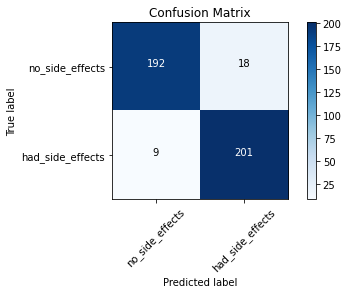

In [25]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')